In [2]:
# ucitavanje biblioteka

import random
import numpy as np
import matplotlib.pyplot as plt
import math

from mpl_toolkits import mplot3d

pi = 3.1415



Size of Data set:  (52, 3) 

Number or samples:  52 



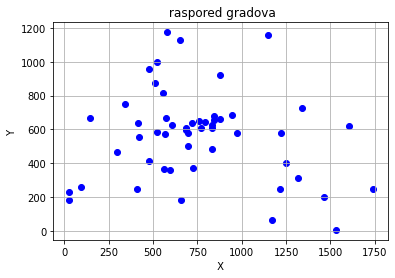

In [6]:
from os import name
# ispitivanje baze

data = np.loadtxt('/content/data_tsp.txt')

size = np.shape(data)

print("Size of Data set: ", size, "\n")
print("Number or samples: ", data.shape[0], "\n")

indeks = data[:, 0]
x_koordinata = data[:,1]
y_koordinata = data[:,2]

"""
plt.figure()
plt.scatter(x,y, color='blue', marker='o')
"""
fig, ax = plt.subplots()
ax.scatter(x_koordinata, y_koordinata, color='blue', marker='o')
plt.xlabel(' X ')
plt.ylabel(' Y ')
plt.title(' raspored gradova')

plt.grid()
plt.show()
for indeks, txt in enumerate(indeks):
    ax.annotate(txt, (x_koordinata[indeks], y_koordinata[indeks]))

In [7]:
"""
# definisanje parametara za GA:
g = 200 # broj generacija  (iteration size)
n = 200 # velicina populacije (koliko ce resenja biti dostupno u generaciji)
mutation_rate = 0.3 # raznolikost resenja 
"""

'\n# definisanje parametara za GA:\ng = 200 # broj generacija  (iteration size)\nn = 200 # velicina populacije (koliko ce resenja biti dostupno u generaciji)\nmutation_rate = 0.3 # raznolikost resenja \n'

# **HROMOZOM:**

In [9]:
# ucitavanje neophodne biblioteke math za racunanje Euklidnskog rastojanja
import math 

# kreiramo Node objekat (moze i dictioonary ili tuple)
class Node:
  def __init__(self, index, x, y):
    self.x = float(x)
    self.y = float(y)
    self.index = int(index)


dataset = []

with open('/content/drive/MyDrive/Colab Notebooks/data_tsp.txt', "r") as f:
  for line in f:   #provera svake linije 
    new_line = line.strip()  #uklanjamo razmake na pocetku i na kraju
    new_line = new_line.split(" ")
    index, x, y = new_line[0], new_line[1], new_line[2]
    dataset.append(Node(index=index, x=x, y=y)) # kreiramo Node objekat i dodajemo ga u data list

N = int(index)  #broj tacaka



In [10]:
# kreiranje "matrice udaljenosti" kako bismo imali informaciju
# o udaljenosti izmedju razlicitih lokacija 

def kreiraj_matricu_udaljenosti(node_list):
  # kreiranje matrice NxN koja sadrzi samo nule
  matrix = [[0 for _ in range(N)] for _ in range(N)]
  print(matrix)

  # racunanje Euklidskog rastojanja
  for i in range(0, len(matrix)-1):
        for j in range(0, len(matrix[0])-1):
            # racuna euklidsko rastojanje izmedju svake tacke
            # i dodaje ga matrici
            # a^2 = b^2 + c^2
            matrix[node_list[i].index][node_list[j].index] = math.sqrt(
                pow((node_list[i].x - node_list[j].x), 2) + pow((node_list[i].y - node_list[j].y), 2)
            )
            # pow() - returns the value of x to the power of y (x**y)

  return matrix


# racunamo sva rastojanja medju svim tackama i kreiramo matricu
# postojanje ove matrice je neophodno da bi se smanjilo vreme izvodjenja i slozenost
matrix = kreiraj_matricu_udaljenosti(dataset)
class Chromosome:
    def __init__(self, node_list):
      self.chromosome = node_list

      chr_representation = []
      for i in range(0, len(node_list)):
        chr_representation.append(self.chromosome[i].index)
        # chr_representation sluzi za jednostavnijeprikazivanje putanje
      self.chr_representation = chr_representation

      distance = 0
      for j in range(1, len(self.chr_representation) - 1):  # get distances from the matrix
        distance += matrix[self.chr_representation[j]-1][self.chr_representation[j + 1]-1]
      self.cost = distance

      self.fitness_value = 1 / self.cost

# klasa Chromosome sadrzi Node listu koja se koristi prilikom Krosing=overa i mutacije


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#  **GA operatori:**

In [11]:
# kreiranje random hromoyoma (random "mesanje" Node liste)
def kreiraj_random_listu(n_list):
  pocetak = n_list[0]
  # pocetna i krajnja tacka su iste
  tempfile = n_list[1:]
  tempfile = random.sample(tempfile, len(tempfile)) 
  tempfile.insert(0,pocetak) # dodavanje pocetne tacke na pocetku hromozoma
  tempfile.append(pocetak) # dodavanje pocetne tacke na kraju 
  return tempfile

# inicijalizacija
def inicijalizacija(data, population_size):
  inicijalna_populacija = []
  # kreira onoliko hromozoma kolika je velicina populacije
  for i in range(0, population_size):  
        tempfile = kreiraj_random_listu(data)
        novi_hromozom = Chromosome(tempfile)
        inicijalna_populacija.append(novi_hromozom)
  return inicijalna_populacija

# selekcija hromozoma od roditelja da bi se kreirali hromozomi potomka
# pravimo takmicenje izmedju svih hromozoma u populaciji
# random odabiramo 4 hromozoma koji se takmice
# najbolji pobedjuje
def selekcija(population): # najvaznija faza GA
  t1, t2, t3, t4 = random.sample(range(0, 99), 4) 
  # kreiranje kandidata
  kandidat1 = population[t1]
  kandidat2 = population[t2]
  kandidat3 = population[t3]
  kandidat4 = population[t4]

  # selekcija pobednika
  if kandidat1.fitness_value > kandidat2.fitness_value:
    pobednik = kandidat1
  else:
    pobednik = kandidat2
  if kandidat3.fitness_value > pobednik.fitness_value:
    pobednik = kandidat3
  if kandidat4.fitness_value > pobednik.fitness_value:
    pobednik = kandidat4

  return pobednik # pobednik = hromozom


# One point crossover metoda (jednotackasto ukrstanje)
def crossover(r1,r2):
  tacka = random.randint(2, 14)

  potomak1 = r1.chromosome[1:tacka]
  ostatak_potomak1 = [item for item in r2.chromosome[1:-1] if item not in potomak1]
  potomak1 += ostatak_potomak1

  potomak2 = r2.chromosome[1:tacka]
  ostatak_potomak2 = [item for item in r1.chromosome[1:-1] if item not in potomak2]
  potomak2 += ostatak_potomak2

  potomak1.insert(0, r1.chromosome[0])
  potomak1.append(r1.chromosome[0])

  potomak2.insert(0, r2.chromosome[0])
  potomak2.append(r2.chromosome[0])

  return potomak1, potomak2

def mutacija(hromozom):  # swap two nodes of the chromosome
    mutation_index1, mutation_index2 = random.sample(range(1, 19), 2)
    hromozom[mutation_index1], hromozom[mutation_index2] = hromozom[mutation_index2], hromozom[mutation_index1]
    return hromozom


# pronalazak najboljeg hromozoma u generaciji
def find_best(generacija):
    best = generacija[0]
    for n in range(1, len(generacija)):
        if generacija[n].cost < best.cost:
            best = generacija[n]
    return best


# Major function!
# elitizam, crossover, mutation operatori za kreiranje nove generacije bazirane na prethodnog generaciji
def kreiranje_nove_generacije(prethodna_generacija, mutation_rate):
    nova_generacija = [find_best(prethodna_generacija)]  # Elitizam. Cuvanje najboljeg iz prethodne generacije.

    # Koristi dva hromoyoma  i generi[e dva hromozoma. prema tome broj iteracije ce biti polovinu velicine populacije
    for a in range(0, int(len(prethodna_generacija)/2)):
        r1 = selekcija(prethodna_generacija)
        r2 = selekcija(prethodna_generacija)

        potomak1, potomak2 = crossover(r1, r2)  #create node lists, Chromosome objects
        potomak1 = Chromosome(potomak1)
        potomak2 = Chromosome(potomak2)

        if random.random() < mutation_rate:
            mut = mutacija(potomak1.chromosome)
            potomak1 = Chromosome(mut)

        nova_generacija.append(potomak1)
        nova_generacija.append(potomak2)

    return nova_generacija


# ***MAIN***

200
200
0.1
0. generation --> cost --> 23555.650592867034
1. generation --> cost --> 22540.396825300635
2. generation --> cost --> 22246.832400582876
3. generation --> cost --> 21079.071205358174
4. generation --> cost --> 20623.878342811055
5. generation --> cost --> 19194.54777466896
6. generation --> cost --> 18645.20018553343
7. generation --> cost --> 17794.709593134645
8. generation --> cost --> 16733.335021948227
9. generation --> cost --> 16733.335021948227
10. generation --> cost --> 16713.65152768963
11. generation --> cost --> 16596.65897200673
12. generation --> cost --> 16191.020617047356
13. generation --> cost --> 16191.020617047356
14. generation --> cost --> 15873.037351549347
15. generation --> cost --> 15706.272262665416
16. generation --> cost --> 15626.623196213639
17. generation --> cost --> 15521.946321928115
18. generation --> cost --> 15273.393853969099
19. generation --> cost --> 14776.083330391337
20. generation --> cost --> 14602.177127445695
21. generation 

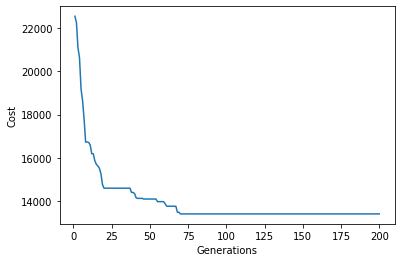

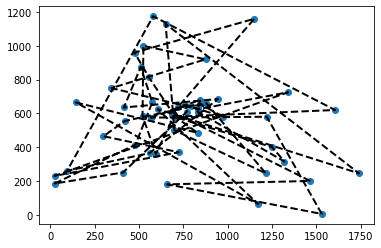

In [14]:
g = 200 # broj generacija  (iteration size)
n = 200 # velicina populacije (koliko ce resenja biti dostupno u generaciji)
mutation_rate = 0.1 # raznolikost resenja 
print(g)
print(n)
print(mutation_rate)

def genetski_algoritam(broj_generacija, pop_size, mutation_rate, data_list):
    nova_generacija = inicijalizacija(data_list, pop_size)  # prva generacija se kreira funkcijom inicijalizacije

    costs_for_plot = []  # this list is only for Cost-Generations graph. it will constitute y-axis of the graph

    for iteration in range(0, broj_generacija):
        nova_generacija = kreiranje_nove_generacije(nova_generacija, mutation_rate)  # create a new generation in each iteration
        # print the cost of first chromosome of each new generation to observe the change over generations
        print(str(iteration) + ". generation --> " + "cost --> " + str(nova_generacija[0].cost))
        costs_for_plot.append(find_best(nova_generacija).cost)  # append the best chromosome's cost of each new generation
        # to the list to plot in the graph

    return nova_generacija, costs_for_plot


def draw_cost_generation(y_list):
    x_list = np.arange(1, len(y_list)+1)  # create a numpy list from 1 to the numbers of generations

    plt.plot(x_list, y_list)

   # plt.title("Route Cost through Generations")
    plt.xlabel("Generations")
    plt.ylabel("Cost")

    plt.show()


def draw_path(solution):
    x_list = []
    y_list = []

    for m in range(0, len(solution.chromosome)):
        x_list.append(solution.chromosome[m].x)
        y_list.append(solution.chromosome[m].y)

    fig, ax = plt.subplots()
    plt.scatter(x_list, y_list)  # alpha=0.5

    ax.plot(x_list, y_list, '--', lw=2, color='black', ms=10)
    #ax.set_xlim(0, 1650)
    #ax.set_ylim(0, 1300)
    
    plt.show()



last_generation, y_axis = genetski_algoritam(
broj_generacija = g, pop_size=n, mutation_rate=mutation_rate, data_list=dataset
)

best_solution = find_best(last_generation)

draw_cost_generation(y_axis)

draw_path(best_solution)

